In [1]:
from deepface import DeepFace

ValueError: You have tensorflow 2.17.0 and this requires tf-keras package. Please run `pip install tf-keras` or downgrade your tensorflow.

### Video postprocesseing

In [309]:
import os
import pickle
import numpy as np
import cv2 as cv

class VideoPreprocessor:
    def __init__(self, directory, video_path):
        self.directory = directory
        self.video_path = video_path
        self.fps = None
        self.frame_count = 0
        self.extracted_frame_count = 0

    def empty_folder(self):
        for file in os.listdir(self.directory):
            file_path = os.path.join(self.directory, file)
            if os.path.isfile(file_path):
                os.remove(file_path)
        return True

    def extract_frames_per_second(self):
        try:
            cap = cv.VideoCapture(self.video_path)
            if not cap.isOpened():
                raise IOError("Error opening video!")

            self.fps = cap.get(cv.CAP_PROP_FPS)
            if self.fps <= 0:
                raise ValueError("Invalid FPS value.")

            if self.empty_folder():
                while True:
                    ret, frame = cap.read()

                    if not ret:
                        print("End of video reached.")
                        break

                    # Extract one frame per second
                    if self.frame_count % int(self.fps) == 0:
                        filename = f"{self.directory}/frame_{self.extracted_frame_count}.jpg"
                        cv.imwrite(filename, frame)
                        self.extracted_frame_count += 1

                    self.frame_count += 1

                print(f"Extracted {self.extracted_frame_count} frames to {self.directory}")

        except IOError as e:
            print(f"IOError: {e}")
        except ValueError as e:
            print(f"ValueError: {e}")
        finally:
            cap.release()

# Example usage
if __name__ == "__main__":
    directory = "Frames_spd"
    video_path = "/Users/naveenpoliasetty/Downloads/David2.0/david2.0/WhatsApp Video 2024-08-08 at 22.19.13.mp4"

    if not os.path.exists(directory):
        os.makedirs(directory)

    preprocessor = VideoPreprocessor(directory, video_path)
    preprocessor.extract_frames_per_second()

End of video reached.
Extracted 8 frames to Frames_spd


## Detecting faces

In [341]:
import os

path = '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd'
address = os.listdir(path)
address = ['/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/' + x for x in address]
faces = []

def generate_embeddings(address):
    locations = []
    meta_data = []
    for index, x in enumerate(address):
        res = DeepFace.extract_faces(x,enforce_detection=False)
        for i in range(len(res)):
            meta_data.append(res)
            locations.append((res[i]['facial_area']['x'] ,res[i]['facial_area']['y'] , (res[i]['facial_area']['w']+res[i]['facial_area']['x']) , (res[i]['facial_area']['h']+res[i]['facial_area']['y'])) )
    return locations, meta_data
    
embeddings, meta_data = generate_embeddings(address=address)


In [344]:
address

['/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_6.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_7.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_5.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_4.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_0.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_1.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_3.jpg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_2.jpg']

In [343]:
meta_data

[[{'face': array([[[0.01176471, 0.04705882, 0.04313725],
           [0.01176471, 0.04705882, 0.04313725],
           [0.01176471, 0.04705882, 0.04313725],
           ...,
           [0.43529412, 0.49803922, 0.56078431],
           [0.43529412, 0.50196078, 0.56470588],
           [0.43921569, 0.50588235, 0.56862745]],
   
          [[0.01176471, 0.04705882, 0.04313725],
           [0.01176471, 0.04705882, 0.04313725],
           [0.01176471, 0.04705882, 0.04313725],
           ...,
           [0.43921569, 0.50196078, 0.56470588],
           [0.43921569, 0.50588235, 0.56862745],
           [0.43921569, 0.50588235, 0.56862745]],
   
          [[0.01176471, 0.04705882, 0.04313725],
           [0.01176471, 0.04705882, 0.04313725],
           [0.01176471, 0.04705882, 0.04313725],
           ...,
           [0.43921569, 0.50196078, 0.56470588],
           [0.43921569, 0.50588235, 0.56862745],
           [0.43921569, 0.50588235, 0.56862745]],
   
          ...,
   
          [[0.27058824, 0.34

In [328]:
from mtcnn import MTCNN
from PIL import Image
import numpy as np

# Initialize MTCNN
detector = MTCNN()

path = '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd'
address = os.listdir(path)
address = ['/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/' + x for x in address]

# Load the image

coordinates = []
for x in address:
    image = Image.open(x)
    image_np = np.array(image)

# Detect faces
    results = detector.detect_faces(image_np)

    # Print the coordinates of the detected faces
    for result in results:
        x, y, width, height = result['box']
        coordinates.append((x, y, x+width, y+height))
        

1/1 [==============================] - 0s 12ms/step


In [329]:
coordinates

[(58, 264, 281, 550),
 (50, 136, 162, 274),
 (162, 241, 366, 518),
 (0, 37, 76, 192),
 (327, 233, 466, 402),
 (183, 341, 323, 523),
 (0, 23, 114, 176),
 (102, 273, 266, 521),
 (228, 371, 325, 474),
 (44, 196, 178, 368)]

## Face mapping

In [339]:
coordinates

[(58, 264, 281, 550),
 (50, 136, 162, 274),
 (162, 241, 366, 518),
 (0, 37, 76, 192),
 (327, 233, 466, 402),
 (183, 341, 323, 523),
 (0, 23, 114, 176),
 (102, 273, 266, 521),
 (228, 371, 325, 474),
 (44, 196, 178, 368)]

In [340]:
from PIL import Image

def extract_bbox(image_path, bbox):
    # Open the image file
    with Image.open(image_path) as img:
        left, upper, right, lower = bbox
        
        # Crop the image to the bounding box
        cropped_image = img.crop((left, upper, right, lower))
        
        return cropped_image

# Example usage
image_path = '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/expirements/Frames/frame_0.jpg' # Example bounding box coordinates
patches = [f'/Users/naveenpoliasetty/Downloads/David2.0/david2.0/Frames_spd/frame_{x}.jpg' for x in range(len(os.listdir(path)))]

for patch in patches:
    for index, x in enumerate(coordinates):
        cropped_image = extract_bbox(patch, x)
        cropped_image.save(f'cropped_image{index}.jpg')  # Save the cropped image


In [337]:
mappings = ['cropped_image' + str(x) + '.jpg' for x in range(7)]
students = os.listdir('/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD')
students = ['/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/' + s for s in students]
ans = []
sols = []
for x in mappings:
    for y in students:
        sol = DeepFace.verify(x,y,enforce_detection=False)
        if sol['verified'] == True :
            sols.append(sol)
            ans.append(y)


In [338]:
ans

['/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/WhatsApp Image 2024-08-08 at 22.19.14.jpeg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/WhatsApp Image 2024-08-08 at 22.19.14.jpeg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/WhatsApp Image 2024-08-08 at 22.19.14.jpeg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/WhatsApp Image 2024-08-08 at 22.19.14.jpeg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/WhatsApp Image 2024-08-08 at 22.19.14.jpeg',
 '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/SPD/WhatsApp Image 2024-08-08 at 22.19.14.jpeg']

In [299]:
sols

[{'verified': True,
  'distance': 0.44997004893543957,
  'threshold': 0.68,
  'model': 'VGG-Face',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 0,
    'y': 1,
    'w': 62,
    'h': 62,
    'left_eye': None,
    'right_eye': None},
   'img2': {'x': 0,
    'y': 0,
    'w': 192,
    'h': 256,
    'left_eye': None,
    'right_eye': None}},
  'time': 0.29},
 {'verified': True,
  'distance': 0.5947136743480468,
  'threshold': 0.68,
  'model': 'VGG-Face',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 0,
    'y': 1,
    'w': 62,
    'h': 62,
    'left_eye': None,
    'right_eye': None},
   'img2': {'x': 0,
    'y': 0,
    'w': 140,
    'h': 256,
    'left_eye': None,
    'right_eye': None}},
  'time': 0.28},
 {'verified': True,
  'distance': 0.6692567283975275,
  'threshold': 0.68,
  'model': 'VGG-Face',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'im

In [334]:
len(coordinates)

10

In [336]:
for x in coordinates:
    print(x)

(58, 264, 281, 550)
(50, 136, 162, 274)
(162, 241, 366, 518)
(0, 37, 76, 192)
(327, 233, 466, 402)
(183, 341, 323, 523)
(0, 23, 114, 176)
(102, 273, 266, 521)
(228, 371, 325, 474)
(44, 196, 178, 368)


In [264]:
import numpy as np

# Define the target size
target_size = (256, 256, 3)

# List of your embeddings


# Function to pad an embedding to the target size
def pad_embedding(embedding):
    target_size = (256, 256, 3)
    padded = np.zeros(target_size)
    current_size = embedding.shape
    padded[:current_size[0], :current_size[1], :current_size[2]] = embedding
    return padded

# Pad all embeddings
padded_embeddings = [pad_embedding(e) for e in embeddings]

# Convert the list to a numpy array if needed
padded_embeddings_array = np.array(padded_embeddings)


In [265]:
len(paths)

14

In [266]:
path = '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/resizedimages'
paths = os.listdir(path)
paths = [path + '/'+ x for x in paths]

known_face_encodings = generate_embeddings(paths)


In [267]:
len(known_face_encodings)

14

In [268]:
for x in known_face_encodings:
    print(x.shape)

(98, 98, 3)
(77, 77, 3)
(101, 101, 3)
(107, 107, 3)
(60, 60, 3)
(73, 73, 3)
(96, 96, 3)
(87, 87, 3)
(68, 68, 3)
(102, 102, 3)
(47, 47, 3)
(65, 65, 3)
(256, 192, 3)
(256, 140, 3)


In [269]:
resize_ = [pad_embedding(e) for e in known_face_encodings]
resize_ = np.array(resize_)

In [270]:
import numpy as np

import math

import math
import numpy as np



def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    similarity = dot_product / (magnitude_v1 * magnitude_v2)
    return similarity


In [271]:
for x in padded_embeddings:
    print((x[:,:,1].shape))

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [214]:
for y in padded_embeddings:
    y = y[:,:,::-1]
    t = y[:,:,1]
    print(t.shape)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [221]:
l = []
for x in padded_embeddings:
    u = []
    x = x[:, :, ::-1]
    x = x[:,:,1]
    x = x.flatten()
    for y in resize_:
        y = y[:,:,::-1]
        t = y[:,:,1]
        t = t.flatten()
        u.append(cosine_similarity(x,t))
    l.append(u)
        

In [251]:
import numpy as np
from PIL import Image

# Load the image as a NumPy array
image = np.array(Image.open('/Users/naveenpoliasetty/Downloads/David2.0/david2.0/expirements/Frames/frame_0.jpg'))

# Define the coordinates for the region to extract
x, y, w, h = 366, 533,48,51


# Extract the region
cropped_image = image[y:y+h, x:x+w]

# Convert back to an image and save
Image.fromarray(cropped_image).save('cropped_image.jpg')


In [245]:
from mtcnn import MTCNN
from PIL import Image
import numpy as np

# Initialize MTCNN
detector = MTCNN()

# Load the image
image = Image.open('/Users/naveenpoliasetty/Downloads/David2.0/david2.0/expirements/Frames/frame_1.jpg')
image_np = np.array(image)

# Detect faces
results = detector.detect_faces(image_np)

# Print the coordinates of the detected faces
for result in results:
    x, y, width, height = result['box']
    print(f'Face found at (x={x}, y={y}, width={width}, height={height})')


2/2 [==============================] - 0s 6ms/step
Face found at (x=180, y=585, width=100, height=126)
Face found at (x=484, y=540, width=98, height=119)
Face found at (x=366, y=533, width=48, height=51)
Face found at (x=213, y=474, width=43, height=60)
Face found at (x=183, y=759, width=47, height=56)


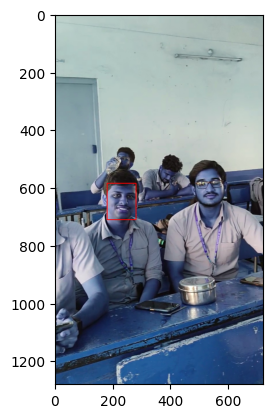

In [253]:
import matplotlib.pyplot as plt
image = cv2.imread('/Users/naveenpoliasetty/Downloads/David2.0/david2.0/expirements/Frames/frame_1.jpg')
x=180
y=585
w=100
h=126
cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(image)

In [256]:
from PIL import Image

def extract_bbox(image_path, bbox):
    # Open the image file
    with Image.open(image_path) as img:
        # bbox is a tuple (left, upper, right, lower)
        left, upper, right, lower = bbox
        
        # Crop the image to the bounding box
        cropped_image = img.crop((left, upper, right, lower))
        
        return cropped_image

# Example usage
image_path = '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/expirements/Frames/frame_1.jpg'
bbox = (180, 585, 280, 711)  # Example bounding box coordinates
cropped_image = extract_bbox(image_path, bbox)
cropped_image.show()  # Display the cropped image
cropped_image.save('cropped_image.jpg')  # Save the cropped image


In [226]:
for x in l:
    print(max(x))

0.8551806425996675
0.6103397696994424
0.745799344404
0.7813461720979514
0.75841583478765
0.8953450133454567
0.7397231734619868


In [141]:
import cv2

# Load the image
image_path = '/Users/naveenpoliasetty/Downloads/David2.0/david2.0/expirements/Frames/frame_0.jpg'
image = cv2.imread(image_path)

# Facial area data
facial_area = {
    'x': 417,
    'y': 538,
    'w': 59,
    'h': 59
}

# Extract coordinates and dimensions
x = facial_area['x']
y = facial_area['y']
w = facial_area['w']
h = facial_area['h']

cropped_face = image[x:x+w,y:y+h]
# Save the cropped face to a file
cv2.imwrite('cropped_face.jpg', cropped_face)


True